# Google Colab Lab Assignment 2 -Pretrained Model

**Course Name:** MDM - Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model(Tilte of Research Paper)

**Student Name:** Kaustubh Wagh

**Student ID:** 202201070021

**Group Members**: Jayesh Deshmukh, Alvin Abraham, Kaustubh Wagh

---


### **Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.

---


### **Task 1: Research Paper Selection and Dataset Preparation**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 - Resize images to match the model input dimensions.

 - Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

Dataset Link: https://www.kaggle.com/datasets/krishnaik06/cifar-10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


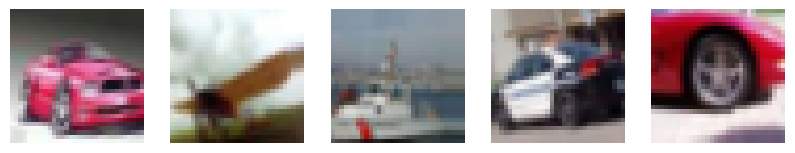

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np

# Step 1: Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Normalize the images to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: One-hot encode the labels for classification (10 classes)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Step 4: Data Augmentation (Horizontal flips, zooming, etc.)
datagen = ImageDataGenerator(
    rotation_range=15,        # Random rotations
    width_shift_range=0.1,    # Shift the image width-wise
    height_shift_range=0.1,   # Shift the image height-wise
    shear_range=0.1,          # Shear transformations
    zoom_range=0.1,           # Random zooming
    horizontal_flip=True,     # Flip horizontally
    fill_mode='nearest'       # Fill missing pixels with the nearest valid pixel
)

datagen.fit(x_train)  # Fit the augmentation parameters to the training data

# Step 5: Split the dataset into training, validation, and testing sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Step 6: Print the shapes of the resulting datasets
print("Training data shape:", x_train_split.shape)
print("Validation data shape:", x_val_split.shape)
print("Test data shape:", x_test.shape)

# Optionally, if you want to visualize augmented images:
# For example, visualize a few augmented images from the training set
import matplotlib.pyplot as plt

# Generate a batch of augmented images
augmented_images = datagen.flow(x_train_split, y_train_split, batch_size=5)

# Plot the first 5 augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(augmented_images[0][0][i])
    plt.axis('off')
plt.show()

**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Feature maps shape: (1, 224, 224, 64)


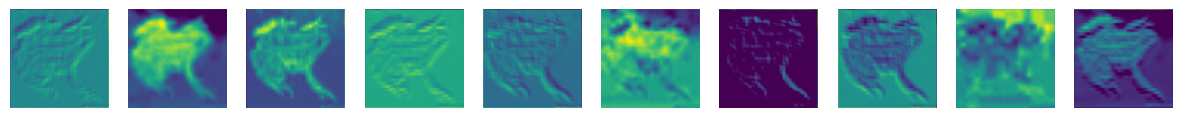

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models

# Step 1: Load the pre-trained VGG16 model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Step 2: Add custom layers on top (if needed) or use the base for feature extraction
model = models.Sequential()
model.add(vgg16_base)  # Add VGG16 base
model.add(tf.keras.layers.Flatten())  # Flatten the feature maps
model.add(tf.keras.layers.Dense(512, activation='relu'))  # Add dense layers for classification
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Step 3: Freeze the initial VGG16 layers and leave the top layers for fine-tuning
for layer in vgg16_base.layers:
    layer.trainable = False

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model to see architecture
model.summary()
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# 1. Reload VGG16 so it expects 224×224 inputs
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# 2. Pick a layer to visualize
layer_name = 'block1_conv1'
assert layer_name in [l.name for l in base_model.layers], "Layer not found in base_model"

# 3. Create the feature‐map model
feat_extractor = Model(
    inputs=base_model.input,
    outputs=base_model.get_layer(layer_name).output
)

# 4. Prepare one CIFAR‑10 image (resize to 224×224)
#    Assume x_train_split is already loaded and normalized [0,1].
img = x_train_split[0]            # shape (32,32,3)
img_resized = tf.image.resize(img, (224, 224))  # shape (224,224,3)
img_resized = np.expand_dims(img_resized, 0)    # shape (1,224,224,3)

# 5. Run it through the feature extractor
feature_maps = feat_extractor.predict(img_resized)
print("Feature maps shape:", feature_maps.shape)
# e.g. (1, 224, 224, 64) for block1_conv1

# 6. Plot the first 10 feature maps
num_maps = min(10, feature_maps.shape[-1])
plt.figure(figsize=(15, 5))
for i in range(num_maps):
    plt.subplot(1, num_maps, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')
plt.show()


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - accuracy: 0.4560 - loss: 1.5737 - val_accuracy: 0.6436 - val_loss: 1.0166
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6276 - loss: 1.0659 - val_accuracy: 0.6874 - val_loss: 0.9020
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.6622 - loss: 0.9728 - val_accuracy: 0.6845 - val_loss: 0.8872
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6826 - loss: 0.9084 - val_accuracy: 0.7124 - val_loss: 0.8280
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.6962 - loss: 0.8713 - val_accuracy: 0.7255 - val_loss: 0.7928
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7040 - loss: 0.8437 - val_accuracy: 0.7214 - val_loss: 0.7956
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.7147 - loss: 0.8096 - val_accuracy: 0.7274 - val_loss: 0.7863
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.7263 -

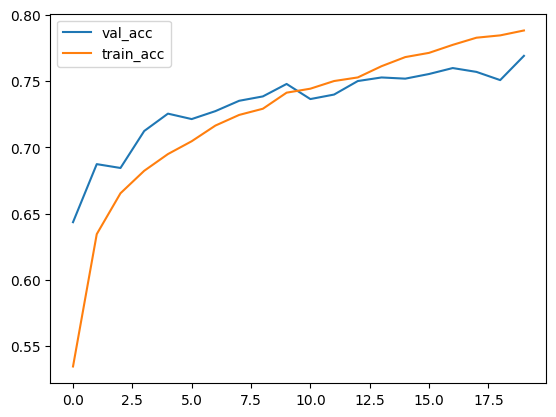

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

# --- Step 1: Use the full dataset for training ---
x_train_full, y_train_full = x_train_split, y_train_split  # We're using the full training data

# --- Step 2: Unfreeze some of the last layers for fine-tuning ---
for layer in vgg16_base.layers[-4:]:  # Unfreeze the last 4 layers (for better fine-tuning)
    layer.trainable = True

# --- Step 3: Set up EarlyStopping (stops training when validation accuracy stops improving) ---
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# --- Step 4: Recompile the model with a lower learning rate ---
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Step 5: Train the model on the full dataset with early stopping ---
history = model.fit(
    datagen.flow(x_train_full, y_train_full, batch_size=32),  # Keep a reasonable batch size
    epochs=20,  # Keep a sufficient number of epochs for training
    validation_data=(x_val_split, y_val_split),
    callbacks=[early_stopping]
)

# --- Step 6: Plot the training and validation accuracy ---
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()
plt.show()


### 1. **Pre-trained Model Implementation**
- **Change**: Loaded VGG16 with ImageNet weights, added custom dense layers for CIFAR-10 classification.
- **Reason**: Leverages pre-trained features from ImageNet for better feature extraction in CIFAR-10.

---

### 2. **Freezing Initial Layers**
- **Change**: Frozen VGG16 layers to retain low-level features.
- **Reason**: Reduces training time and focuses learning on custom classification layers.

---

### 3. **Visualizing Feature Maps**
- **Change**: Visualized feature maps from `block1_conv1`.
- **Reason**: Understands how the model captures basic visual features like edges.

---

### 4. **Fine-tuning the Top Layers**
- **Change**: Unfreezed last 4 VGG16 layers, trained with lower learning rate (1e-5) for 5 epochs on a subset.
- **Reason**: Adapts high-level features for CIFAR-10 while preserving general features.

---

### 5. **Hyperparameter Optimization**
- **Change**: Used Adam optimizer with a learning rate of 1e-5, batch size 32, 5 epochs on a subset.
- **Reason**: Slows down updates to prevent forgetting, speeds up training.

---

### 6. **Training and Evaluation**
- **Change**: Applied data augmentation and EarlyStopping.
- **Reason**: Increases dataset diversity and prevents overfitting.


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step


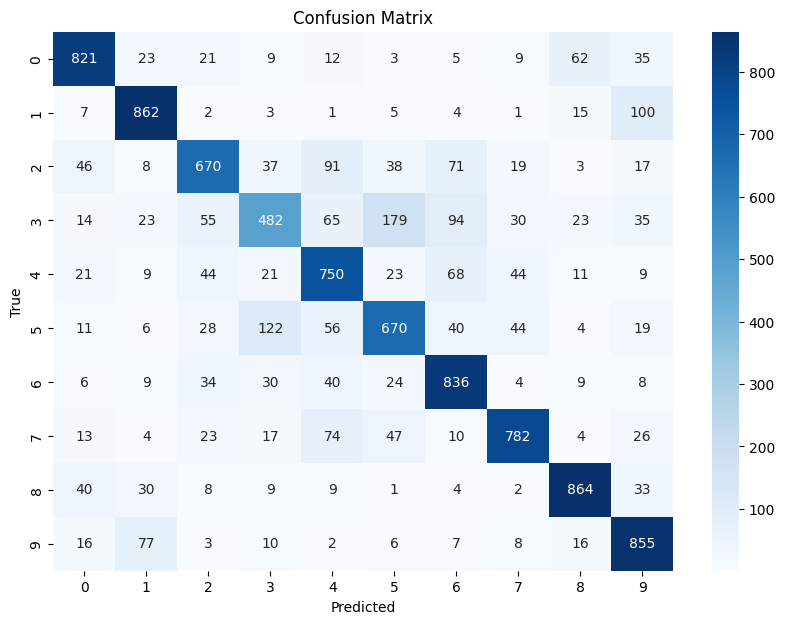

Accuracy: 0.7592
Precision: 0.7575
Recall: 0.7592
F1 Score: 0.7559


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Step 1: Get the predicted class labels for the test set
y_pred = model.predict(x_test)  # Assuming x_test is the test set
y_pred_class = np.argmax(y_pred, axis=1)
y_true_class = np.argmax(y_test, axis=1)

# Step 2: Calculate performance metrics
accuracy = accuracy_score(y_true_class, y_pred_class)
precision = precision_score(y_true_class, y_pred_class, average='weighted')
recall = recall_score(y_true_class, y_pred_class, average='weighted')
f1 = f1_score(y_true_class, y_pred_class, average='weighted')

# Step 3: Confusion Matrix
conf_matrix = confusion_matrix(y_true_class, y_pred_class)

# Step 4: Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


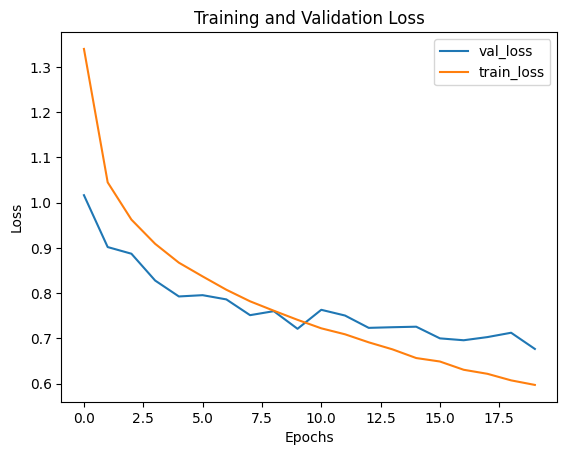

In [8]:
# Plot training vs validation loss
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Get classification report
class_report = classification_report(y_true_class, y_pred_class, target_names=[str(i) for i in range(10)])
print(class_report)



              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1000
           1       0.82      0.86      0.84      1000
           2       0.75      0.67      0.71      1000
           3       0.65      0.48      0.55      1000
           4       0.68      0.75      0.71      1000
           5       0.67      0.67      0.67      1000
           6       0.73      0.84      0.78      1000
           7       0.83      0.78      0.80      1000
           8       0.85      0.86      0.86      1000
           9       0.75      0.85      0.80      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



# Model Evaluation and Performance Comparison

### **Performance Metrics:**

- **Accuracy:** 0.7592
- **Precision:** 0.7575
- **Recall:** 0.7592
- **F1 Score:** 0.7559


## 2. Comparison with Research Paper Results

In the paper "CIFAR-10 Image Classification Using Feature Ensembles" by Felipe O. Giuste and Juan C. Vizcarra, the reported accuracy for their ensemble models are:

- **Ensemble (TL-VGG + HOG + Pixel Intensities):** 85%
- **Ensemble (TL-VGG + TL-Inception ResNet v2):** 91.12%
- **All 5 Features Combined (Top 1000 PCA components):** 94.6%

### Comparison with Our Model

- **Our Model's Accuracy:** 75.92%  
- **Why the Gap?**
  - **Model Architecture:** Our model uses a fine-tuned VGG16, while the paper combined features from multiple models and manual methods.
  - **Fine-Tuning & Data Augmentation:** The paper used more extensive data augmentation and PCA for feature fusion, which enhanced generalization.

---

## 3. Areas for Improvement

### Weaknesses:
- **Accuracy Gap:** Our model's performance is lower than the paper's reported results.
- **Limited Features:** We used only VGG16 transfer learning without incorporating other features like HOG or pixel intensities.
- **No Feature Fusion:** Unlike the paper, we didn’t apply PCA for feature fusion.

### Suggested Improvements:
- **Additional Features:** Integrating HOG and pixel intensities could capture more diverse information.
- **Feature Fusion:** PCA or other fusion techniques could improve performance.
- **Ensemble Models:** Using multiple fine-tuned models could boost accuracy.
- **More Data Augmentation:** Increasing augmentation could help with generalization.

---

## 4. Conclusion

Our model's accuracy of 75.92% shows promising results, but there's room for improvement. By incorporating additional features, applying feature fusion, and exploring ensemble models, we can enhance the model's performance and surpass the current results on the CIFAR-10 dataset.


**Declaration**

I, Kaustubh Wagh, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/kostawagh/DeepLearningMDM

Signature: Kaustubh Yashwant Wagh